In [2]:
pip install seaborn


     ------------------------------------ 293.3/293.3 kB 862.9 kB/s eta 0:00:00
     ---------------------------------------- 7.5/7.5 MB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 470.4/470.4 kB 2.7 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
sns.set(style='white', context='notebook', palette='deep')

# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# import the metrics class
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score,precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Importing Dataset
df=pd.read_csv("adult.csv")
df.head()

#We have 32561 rows and 15 columns
print(df.shape)

#See the column names
print(df.columns)

#Statistics on numerical features
print(df.describe())

#Statistics on non-numerical features
print(df.describe(include=['object']))

#Male and female count in bar chart
df.sex.value_counts()
sns.countplot(x="sex", data=df)
plt.show()


#Race count in bar chart
df.race.value_counts()
sns.countplot(x="race", data=df)
plt.show()


#Target formatting
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
print(df.head(4))

#Check target variable
df.income.value_counts()
sns.countplot(x="income", data=df)
plt.show()


# Identify Numeric features
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

# ------------------------ Handling the numerical features ------------------------

df[numeric_features].hist()

#Correlation
cor_mat = sns.heatmap(df[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

#Income according to gender
sns.countplot(x="sex", hue="income", data=df)
plt.show()


# Missing Values

#Fill Missing Category Entries
df["workclass"] = df["workclass"].fillna("X")
df["occupation"] = df["occupation"].fillna("X")
df["native.country"] = df["native.country"].fillna("United-States")

#Confirm All Missing Data is Handled
print(df.isnull().sum())

#Check for ? in the data
print(df.isin(['?']).sum(axis=0))

#------------------------ Feature Engineering ------------------------

df['native.country'] = df['native.country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

#Number of anormal values.
print(df.isna().sum())


#Make a copy of the data to work on
df_new = df.copy()

#Drop the Null rows
df_new.dropna(how='any',inplace=True)

#Check the shape of the new data
print(df_new.shape)

#Value counts for each category
for c in df_new[cat_features]:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

#Number of unique values for each category
for i in df_new:
    print ("---- %s ---" % i)
    print (df[i].nunique())

#We drop the columns that we do not need based on the number of unique values
df_new.drop(['age', 'fnlwgt', 'capital.gain','capital.loss', 'native.country','education.num'], axis=1, inplace=True)

#Check the new columns
print(list(df_new.columns))

#Check the shape of the new data
print(df_new.shape)

# ------------------------ Handling the categorical features ------------------------

df_new['sex'] = df_new['sex'].map({'Male': 0, 'Female': 1}).astype(int)
df_new['race'] = df_new['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)
df_new['marital.status'] = df_new['marital.status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)
df_new['workclass']= df_new['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)
df_new['relationship'] = df_new['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)
df_new['education']= df_new['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)
df_new['occupation'] = df_new['occupation'].map({ 'Farming-fishing': 0, 'Tech-support': 1, 'Adm-clerical': 2, 'Handlers-cleaners': 3, 
 'Prof-specialty': 4,'Machine-op-inspct': 5, 'Exec-managerial': 6,'Priv-house-serv': 7,'Craft-repair': 8,'Sales': 9, 'Transport-moving': 10, 'Armed-Forces': 11, 'Other-service': 12,'Protective-serv':13}).astype(int)

#Check new data head
print(df_new.head(10))

#Since we only have continious variables right now, we can check he correlation between them

#Education against Income
df_new.groupby('education').income.mean().plot(kind='bar')
plt.show()

#occupation against Income
df_new.groupby('occupation').income.mean().plot(kind='bar')
plt.show()

#Sex against Income
df_new.groupby('sex').income.mean().plot(kind='bar')
plt.show()

#Relationship against Income
df_new.groupby('relationship').income.mean().plot(kind='bar')
plt.show()

#Race against Income
df_new.groupby('race').income.mean().plot(kind='bar')
plt.show()

#workclass against Income
df_new.groupby('workclass').income.mean().plot(kind='bar')
plt.show()

#------------------------ Splitting the data ------------------------

X = df_new.drop('income',axis=1)
y = df_new.income

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

#------------------------ Model Building ------------------------

#------------------------ Logistic Regression ------------------------

log_reg = LogisticRegression()
#Train our model with the training data
log_reg.fit(X_train, y_train)

#print our price predictions on our test data
pred_log = log_reg.predict(X_test)

accuracy_log_reg = metrics.accuracy_score(y_test, pred_log)

print(f"The accuracy of the Logistic Regression model is {round(metrics.accuracy_score(y_test,pred_log),3)*100} %")

auc_log = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])
print(f"The Area Under Curve Score  is {round(auc_log,3)*100} %")

#------------------------ Random Forest ------------------------

rf=RandomForestClassifier(min_samples_split=30)
# Train the model using the training sets
rf.fit(X_train,y_train)
predictions_rf =rf.predict(X_test)

accuracy_rf = metrics.accuracy_score(y_test, predictions_rf)

print(f"The accuracy of the Random Forest model is {round(metrics.accuracy_score(y_test,predictions_rf),3)*100} %")

auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
print(f"The Area Under Curve Score  is {round(auc_rf,3)*100} %")

# Overall

model = ['LR',"RF"]

result = {'Model':['Logistic Regression',"Random Forest"],
          'Accuracy':[accuracy_log_reg,accuracy_rf],
         'AUC':[accuracy_log_reg,auc_rf]}

result_df = pd.DataFrame(data=result,index=model)

print(result_df)

print("Overall Best Model is Random Forest")

#------------------------ Feature Importance for Random Forest ------------------------

feature_importances = list(zip(X_train, rf.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];

feature_names_8 = [i[0] for i in feature_importances_ranked[:8]]
y_ticks = np.arange(0, len(feature_names_8))
x_axis = [i[1] for i in feature_importances_ranked[:8]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_8, x_axis)   #horizontal barplot
plt.title('Random Forest Feature Importance for Top 8 Features',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()

Matplotlib is building the font cache; this may take a moment.


ModuleNotFoundError: No module named 'sklearn'

In [5]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
sns.set(style='white', context='notebook', palette='deep')

# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# import the metrics class
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score,precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Importing Dataset
df=pd.read_csv("adult.csv")
df.head()

#We have 32561 rows and 15 columns
print(df.shape)

#See the column names
print(df.columns)

#Statistics on numerical features
print(df.describe())

#Statistics on non-numerical features
print(df.describe(include=['object']))

#Male and female count in bar chart
df.sex.value_counts()
sns.countplot(x="sex", data=df)
plt.show()


#Race count in bar chart
df.race.value_counts()
sns.countplot(x="race", data=df)
plt.show()


#Target formatting
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
print(df.head(4))

#Check target variable
df.income.value_counts()
sns.countplot(x="income", data=df)
plt.show()


# Identify Numeric features
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

# ------------------------ Handling the numerical features ------------------------

df[numeric_features].hist()

#Correlation
cor_mat = sns.heatmap(df[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

#Income according to gender
sns.countplot(x="sex", hue="income", data=df)
plt.show()


# Missing Values

#Fill Missing Category Entries
df["workclass"] = df["workclass"].fillna("X")
df["occupation"] = df["occupation"].fillna("X")
df["native.country"] = df["native.country"].fillna("United-States")

#Confirm All Missing Data is Handled
print(df.isnull().sum())

#Check for ? in the data
print(df.isin(['?']).sum(axis=0))

#------------------------ Feature Engineering ------------------------

df['native.country'] = df['native.country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

#Number of anormal values.
print(df.isna().sum())


#Make a copy of the data to work on
df_new = df.copy()

#Drop the Null rows
df_new.dropna(how='any',inplace=True)

#Check the shape of the new data
print(df_new.shape)

#Value counts for each category
for c in df_new[cat_features]:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

#Number of unique values for each category
for i in df_new:
    print ("---- %s ---" % i)
    print (df[i].nunique())

#We drop the columns that we do not need based on the number of unique values
df_new.drop(['age', 'fnlwgt', 'capital.gain','capital.loss', 'native.country','education.num'], axis=1, inplace=True)

#Check the new columns
print(list(df_new.columns))

#Check the shape of the new data
print(df_new.shape)

# ------------------------ Handling the categorical features ------------------------

df_new['sex'] = df_new['sex'].map({'Male': 0, 'Female': 1}).astype(int)
df_new['race'] = df_new['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)
df_new['marital.status'] = df_new['marital.status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)
df_new['workclass']= df_new['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)
df_new['relationship'] = df_new['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)
df_new['education']= df_new['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)
df_new['occupation'] = df_new['occupation'].map({ 'Farming-fishing': 0, 'Tech-support': 1, 'Adm-clerical': 2, 'Handlers-cleaners': 3, 
 'Prof-specialty': 4,'Machine-op-inspct': 5, 'Exec-managerial': 6,'Priv-house-serv': 7,'Craft-repair': 8,'Sales': 9, 'Transport-moving': 10, 'Armed-Forces': 11, 'Other-service': 12,'Protective-serv':13}).astype(int)

#Check new data head
print(df_new.head(10))

#Since we only have continious variables right now, we can check he correlation between them

#Education against Income
df_new.groupby('education').income.mean().plot(kind='bar')
plt.show()

#occupation against Income
df_new.groupby('occupation').income.mean().plot(kind='bar')
plt.show()

#Sex against Income
df_new.groupby('sex').income.mean().plot(kind='bar')
plt.show()

#Relationship against Income
df_new.groupby('relationship').income.mean().plot(kind='bar')
plt.show()

#Race against Income
df_new.groupby('race').income.mean().plot(kind='bar')
plt.show()

#workclass against Income
df_new.groupby('workclass').income.mean().plot(kind='bar')
plt.show()

#------------------------ Splitting the data ------------------------

X = df_new.drop('income',axis=1)
y = df_new.income

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

#------------------------ Model Building ------------------------

#------------------------ Logistic Regression ------------------------

log_reg = LogisticRegression()
#Train our model with the training data
log_reg.fit(X_train, y_train)

#print our price predictions on our test data
pred_log = log_reg.predict(X_test)

accuracy_log_reg = metrics.accuracy_score(y_test, pred_log)

print(f"The accuracy of the Logistic Regression model is {round(metrics.accuracy_score(y_test,pred_log),3)*100} %")

auc_log = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])
print(f"The Area Under Curve Score  is {round(auc_log,3)*100} %")

#------------------------ Random Forest ------------------------

rf=RandomForestClassifier(min_samples_split=30)
# Train the model using the training sets
rf.fit(X_train,y_train)
predictions_rf =rf.predict(X_test)

accuracy_rf = metrics.accuracy_score(y_test, predictions_rf)

print(f"The accuracy of the Random Forest model is {round(metrics.accuracy_score(y_test,predictions_rf),3)*100} %")

auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
print(f"The Area Under Curve Score  is {round(auc_rf,3)*100} %")

# Overall

model = ['LR',"RF"]

result = {'Model':['Logistic Regression',"Random Forest"],
          'Accuracy':[accuracy_log_reg,accuracy_rf],
         'AUC':[accuracy_log_reg,auc_rf]}

result_df = pd.DataFrame(data=result,index=model)

print(result_df)

print("Overall Best Model is Random Forest")

#------------------------ Feature Importance for Random Forest ------------------------

feature_importances = list(zip(X_train, rf.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];

feature_names_8 = [i[0] for i in feature_importances_ranked[:8]]
y_ticks = np.arange(0, len(feature_names_8))
x_axis = [i[1] for i in feature_importances_ranked[:8]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_8, x_axis)   #horizontal barplot
plt.title('Random Forest Feature Importance for Top 8 Features',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()

ModuleNotFoundError: No module named 'sklearn'

In [7]:
pip install scikit-learn


     ---------------------------------------- 9.2/9.2 MB 1.8 MB/s eta 0:00:00
     -------------------------------------- 44.0/44.0 MB 814.0 kB/s eta 0:00:00
     -------------------------------------- 302.0/302.0 kB 2.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
sns.set(style='white', context='notebook', palette='deep')

# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# import the metrics class
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score,precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Importing Dataset
df=pd.read_csv("adult.csv")
df.head()

#We have 32561 rows and 15 columns
print(df.shape)

#See the column names
print(df.columns)

#Statistics on numerical features
print(df.describe())

#Statistics on non-numerical features
print(df.describe(include=['object']))

#Male and female count in bar chart
df.sex.value_counts()
sns.countplot(x="sex", data=df)
plt.show()


#Race count in bar chart
df.race.value_counts()
sns.countplot(x="race", data=df)
plt.show()


#Target formatting
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
print(df.head(4))

#Check target variable
df.income.value_counts()
sns.countplot(x="income", data=df)
plt.show()


# Identify Numeric features
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

# ------------------------ Handling the numerical features ------------------------

df[numeric_features].hist()

#Correlation
cor_mat = sns.heatmap(df[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

#Income according to gender
sns.countplot(x="sex", hue="income", data=df)
plt.show()


# Missing Values

#Fill Missing Category Entries
df["workclass"] = df["workclass"].fillna("X")
df["occupation"] = df["occupation"].fillna("X")
df["native.country"] = df["native.country"].fillna("United-States")

#Confirm All Missing Data is Handled
print(df.isnull().sum())

#Check for ? in the data
print(df.isin(['?']).sum(axis=0))

#------------------------ Feature Engineering ------------------------

df['native.country'] = df['native.country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

#Number of anormal values.
print(df.isna().sum())


#Make a copy of the data to work on
df_new = df.copy()

#Drop the Null rows
df_new.dropna(how='any',inplace=True)

#Check the shape of the new data
print(df_new.shape)

#Value counts for each category
for c in df_new[cat_features]:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

#Number of unique values for each category
for i in df_new:
    print ("---- %s ---" % i)
    print (df[i].nunique())

#We drop the columns that we do not need based on the number of unique values
df_new.drop(['age', 'fnlwgt', 'capital.gain','capital.loss', 'native.country','education.num'], axis=1, inplace=True)

#Check the new columns
print(list(df_new.columns))

#Check the shape of the new data
print(df_new.shape)

# ------------------------ Handling the categorical features ------------------------

df_new['sex'] = df_new['sex'].map({'Male': 0, 'Female': 1}).astype(int)
df_new['race'] = df_new['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)
df_new['marital.status'] = df_new['marital.status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)
df_new['workclass']= df_new['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)
df_new['relationship'] = df_new['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)
df_new['education']= df_new['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)
df_new['occupation'] = df_new['occupation'].map({ 'Farming-fishing': 0, 'Tech-support': 1, 'Adm-clerical': 2, 'Handlers-cleaners': 3, 
 'Prof-specialty': 4,'Machine-op-inspct': 5, 'Exec-managerial': 6,'Priv-house-serv': 7,'Craft-repair': 8,'Sales': 9, 'Transport-moving': 10, 'Armed-Forces': 11, 'Other-service': 12,'Protective-serv':13}).astype(int)

#Check new data head
print(df_new.head(10))

#Since we only have continious variables right now, we can check he correlation between them

#Education against Income
df_new.groupby('education').income.mean().plot(kind='bar')
plt.show()

#occupation against Income
df_new.groupby('occupation').income.mean().plot(kind='bar')
plt.show()

#Sex against Income
df_new.groupby('sex').income.mean().plot(kind='bar')
plt.show()

#Relationship against Income
df_new.groupby('relationship').income.mean().plot(kind='bar')
plt.show()

#Race against Income
df_new.groupby('race').income.mean().plot(kind='bar')
plt.show()

#workclass against Income
df_new.groupby('workclass').income.mean().plot(kind='bar')
plt.show()

#------------------------ Splitting the data ------------------------

X = df_new.drop('income',axis=1)
y = df_new.income

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

#------------------------ Model Building ------------------------

#------------------------ Logistic Regression ------------------------

log_reg = LogisticRegression()
#Train our model with the training data
log_reg.fit(X_train, y_train)

#print our price predictions on our test data
pred_log = log_reg.predict(X_test)

accuracy_log_reg = metrics.accuracy_score(y_test, pred_log)

print(f"The accuracy of the Logistic Regression model is {round(metrics.accuracy_score(y_test,pred_log),3)*100} %")

auc_log = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])
print(f"The Area Under Curve Score  is {round(auc_log,3)*100} %")

#------------------------ Random Forest ------------------------

rf=RandomForestClassifier(min_samples_split=30)
# Train the model using the training sets
rf.fit(X_train,y_train)
predictions_rf =rf.predict(X_test)

accuracy_rf = metrics.accuracy_score(y_test, predictions_rf)

print(f"The accuracy of the Random Forest model is {round(metrics.accuracy_score(y_test,predictions_rf),3)*100} %")

auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
print(f"The Area Under Curve Score  is {round(auc_rf,3)*100} %")

# Overall

model = ['LR',"RF"]

result = {'Model':['Logistic Regression',"Random Forest"],
          'Accuracy':[accuracy_log_reg,accuracy_rf],
         'AUC':[accuracy_log_reg,auc_rf]}

result_df = pd.DataFrame(data=result,index=model)

print(result_df)

print("Overall Best Model is Random Forest")

#------------------------ Feature Importance for Random Forest ------------------------

feature_importances = list(zip(X_train, rf.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];

feature_names_8 = [i[0] for i in feature_importances_ranked[:8]]
y_ticks = np.arange(0, len(feature_names_8))
x_axis = [i[1] for i in feature_importances_ranked[:8]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_8, x_axis)   #horizontal barplot
plt.title('Random Forest Feature Importance for Top 8 Features',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\Prerana_Saha\Documents\PYTHON3.10.7\lib\site-packages\sklearn\metrics\__init__.py)

In [9]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
sns.set(style='white', context='notebook', palette='deep')

# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# import the metrics class
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score,precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Importing Dataset
df=pd.read_csv("adult.csv")
df.head()

#We have 32561 rows and 15 columns
print(df.shape)

#See the column names
print(df.columns)

#Statistics on numerical features
print(df.describe())

#Statistics on non-numerical features
print(df.describe(include=['object']))

#Male and female count in bar chart
df.sex.value_counts()
sns.countplot(x="sex", data=df)
plt.show()


#Race count in bar chart
df.race.value_counts()
sns.countplot(x="race", data=df)
plt.show()


#Target formatting
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
print(df.head(4))

#Check target variable
df.income.value_counts()
sns.countplot(x="income", data=df)
plt.show()


# Identify Numeric features
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

# ------------------------ Handling the numerical features ------------------------

df[numeric_features].hist()

#Correlation
cor_mat = sns.heatmap(df[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

#Income according to gender
sns.countplot(x="sex", hue="income", data=df)
plt.show()


# Missing Values

#Fill Missing Category Entries
df["workclass"] = df["workclass"].fillna("X")
df["occupation"] = df["occupation"].fillna("X")
df["native.country"] = df["native.country"].fillna("United-States")

#Confirm All Missing Data is Handled
print(df.isnull().sum())

#Check for ? in the data
print(df.isin(['?']).sum(axis=0))

#------------------------ Feature Engineering ------------------------

df['native.country'] = df['native.country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

#Number of anormal values.
print(df.isna().sum())


#Make a copy of the data to work on
df_new = df.copy()

#Drop the Null rows
df_new.dropna(how='any',inplace=True)

#Check the shape of the new data
print(df_new.shape)

#Value counts for each category
for c in df_new[cat_features]:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

#Number of unique values for each category
for i in df_new:
    print ("---- %s ---" % i)
    print (df[i].nunique())

#We drop the columns that we do not need based on the number of unique values
df_new.drop(['age', 'fnlwgt', 'capital.gain','capital.loss', 'native.country','education.num'], axis=1, inplace=True)

#Check the new columns
print(list(df_new.columns))

#Check the shape of the new data
print(df_new.shape)

# ------------------------ Handling the categorical features ------------------------

df_new['sex'] = df_new['sex'].map({'Male': 0, 'Female': 1}).astype(int)
df_new['race'] = df_new['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)
df_new['marital.status'] = df_new['marital.status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)
df_new['workclass']= df_new['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)
df_new['relationship'] = df_new['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)
df_new['education']= df_new['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)
df_new['occupation'] = df_new['occupation'].map({ 'Farming-fishing': 0, 'Tech-support': 1, 'Adm-clerical': 2, 'Handlers-cleaners': 3, 
 'Prof-specialty': 4,'Machine-op-inspct': 5, 'Exec-managerial': 6,'Priv-house-serv': 7,'Craft-repair': 8,'Sales': 9, 'Transport-moving': 10, 'Armed-Forces': 11, 'Other-service': 12,'Protective-serv':13}).astype(int)

#Check new data head
print(df_new.head(10))

#Since we only have continious variables right now, we can check he correlation between them

#Education against Income
df_new.groupby('education').income.mean().plot(kind='bar')
plt.show()

#occupation against Income
df_new.groupby('occupation').income.mean().plot(kind='bar')
plt.show()

#Sex against Income
df_new.groupby('sex').income.mean().plot(kind='bar')
plt.show()

#Relationship against Income
df_new.groupby('relationship').income.mean().plot(kind='bar')
plt.show()

#Race against Income
df_new.groupby('race').income.mean().plot(kind='bar')
plt.show()

#workclass against Income
df_new.groupby('workclass').income.mean().plot(kind='bar')
plt.show()

#------------------------ Splitting the data ------------------------

X = df_new.drop('income',axis=1)
y = df_new.income

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

#------------------------ Model Building ------------------------

#------------------------ Logistic Regression ------------------------

log_reg = LogisticRegression()
#Train our model with the training data
log_reg.fit(X_train, y_train)

#print our price predictions on our test data
pred_log = log_reg.predict(X_test)

accuracy_log_reg = metrics.accuracy_score(y_test, pred_log)

print(f"The accuracy of the Logistic Regression model is {round(metrics.accuracy_score(y_test,pred_log),3)*100} %")

auc_log = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])
print(f"The Area Under Curve Score  is {round(auc_log,3)*100} %")

#------------------------ Random Forest ------------------------

rf=RandomForestClassifier(min_samples_split=30)
# Train the model using the training sets
rf.fit(X_train,y_train)
predictions_rf =rf.predict(X_test)

accuracy_rf = metrics.accuracy_score(y_test, predictions_rf)

print(f"The accuracy of the Random Forest model is {round(metrics.accuracy_score(y_test,predictions_rf),3)*100} %")

auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
print(f"The Area Under Curve Score  is {round(auc_rf,3)*100} %")

# Overall

model = ['LR',"RF"]

result = {'Model':['Logistic Regression',"Random Forest"],
          'Accuracy':[accuracy_log_reg,accuracy_rf],
         'AUC':[accuracy_log_reg,auc_rf]}

result_df = pd.DataFrame(data=result,index=model)

print(result_df)

print("Overall Best Model is Random Forest")

#------------------------ Feature Importance for Random Forest ------------------------

feature_importances = list(zip(X_train, rf.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];

feature_names_8 = [i[0] for i in feature_importances_ranked[:8]]
y_ticks = np.arange(0, len(feature_names_8))
x_axis = [i[1] for i in feature_importances_ranked[:8]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_8, x_axis)   #horizontal barplot
plt.title('Random Forest Feature Importance for Top 8 Features',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\Prerana_Saha\Documents\PYTHON3.10.7\lib\site-packages\sklearn\metrics\__init__.py)

(32561, 15)
Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')
                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.pe

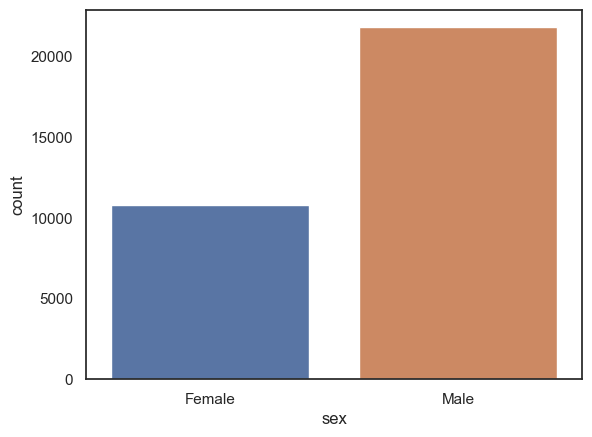

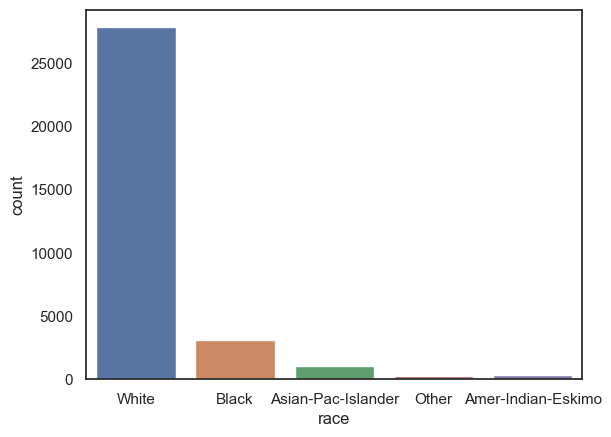

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   

   capital.loss  hours.per.week native.country  income  
0          4356              40  United-States       0  
1          4356              18  United-States       0  
2          4356              40  United-States       0  
3          3900              40  United-States       0  


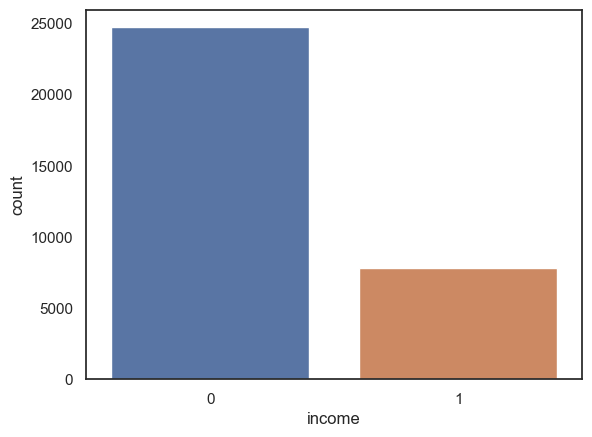

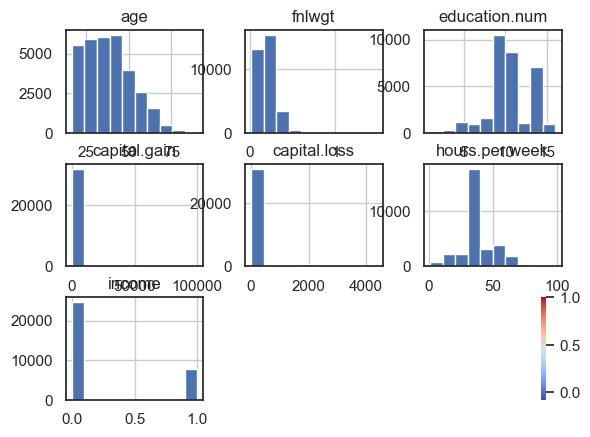

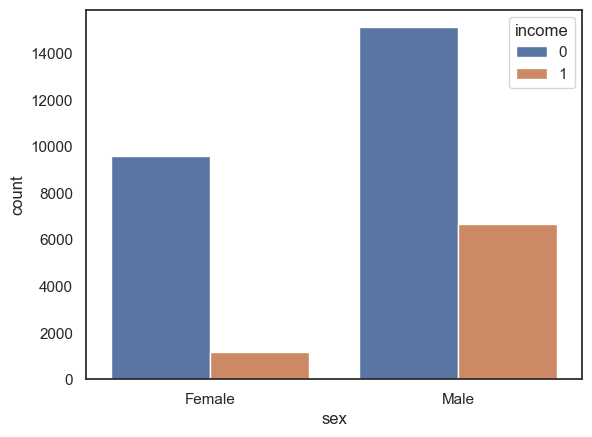

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income 

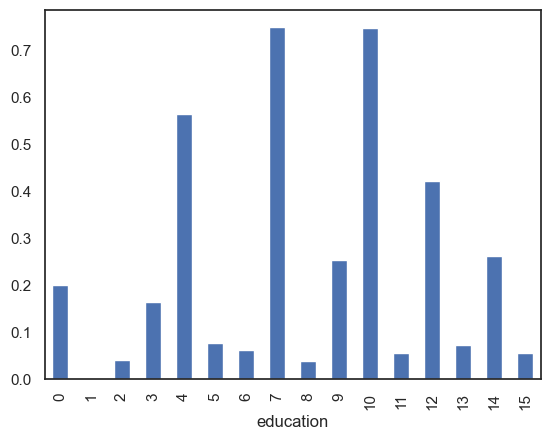

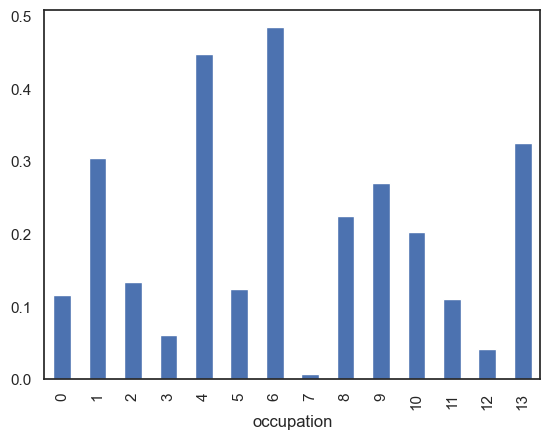

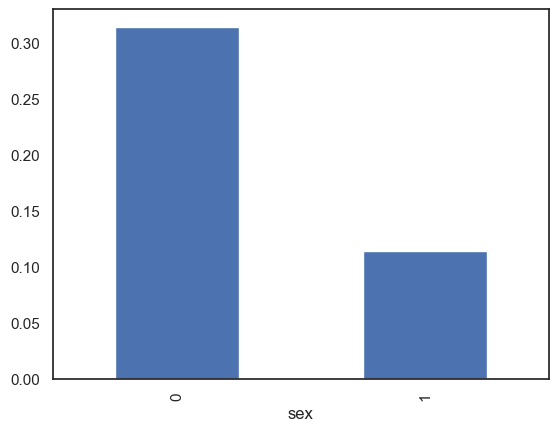

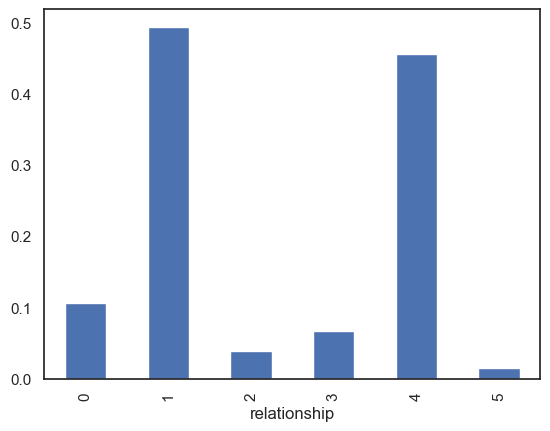

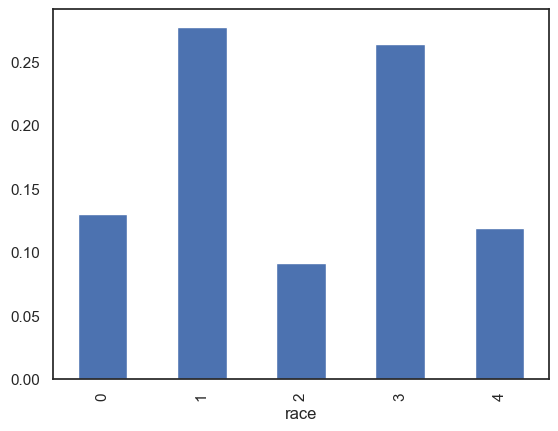

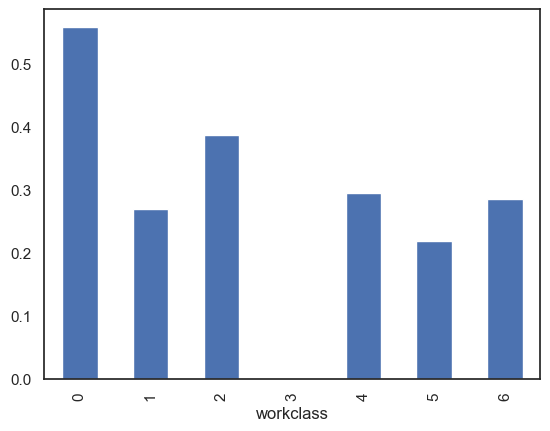

The accuracy of the Logistic Regression model is 76.2 %
The Area Under Curve Score  is 79.60000000000001 %
                  Model  Accuracy       AUC
LR  Logistic Regression  0.761742  0.761742


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
sns.set(style='white', context='notebook', palette='deep')

# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# import the metrics class
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score,precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Importing Dataset
df=pd.read_csv("adult.csv")
df.head()

#We have 32561 rows and 15 columns
print(df.shape)

#See the column names
print(df.columns)

#Statistics on numerical features
print(df.describe())

#Statistics on non-numerical features
print(df.describe(include=['object']))

#Male and female count in bar chart
df.sex.value_counts()
sns.countplot(x="sex", data=df)
plt.show()


#Race count in bar chart
df.race.value_counts()
sns.countplot(x="race", data=df)
plt.show()


#Target formatting
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
print(df.head(4))

#Check target variable
df.income.value_counts()
sns.countplot(x="income", data=df)
plt.show()


# Identify Numeric features
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

# ------------------------ Handling the numerical features ------------------------

df[numeric_features].hist()

#Correlation
cor_mat = sns.heatmap(df[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

#Income according to gender
sns.countplot(x="sex", hue="income", data=df)
plt.show()


# Missing Values

#Fill Missing Category Entries
df["workclass"] = df["workclass"].fillna("X")
df["occupation"] = df["occupation"].fillna("X")
df["native.country"] = df["native.country"].fillna("United-States")

#Confirm All Missing Data is Handled
print(df.isnull().sum())

#Check for ? in the data
print(df.isin(['?']).sum(axis=0))

#------------------------ Feature Engineering ------------------------

df['native.country'] = df['native.country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

#Number of anormal values.
print(df.isna().sum())


#Make a copy of the data to work on
df_new = df.copy()

#Drop the Null rows
df_new.dropna(how='any',inplace=True)

#Check the shape of the new data
print(df_new.shape)

#Value counts for each category
for c in df_new[cat_features]:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

#Number of unique values for each category
for i in df_new:
    print ("---- %s ---" % i)
    print (df[i].nunique())

#We drop the columns that we do not need based on the number of unique values
df_new.drop(['age', 'fnlwgt', 'capital.gain','capital.loss', 'native.country','education.num'], axis=1, inplace=True)

#Check the new columns
print(list(df_new.columns))

#Check the shape of the new data
print(df_new.shape)

# ------------------------ Handling the categorical features ------------------------

df_new['sex'] = df_new['sex'].map({'Male': 0, 'Female': 1}).astype(int)
df_new['race'] = df_new['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)
df_new['marital.status'] = df_new['marital.status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)
df_new['workclass']= df_new['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)
df_new['relationship'] = df_new['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)
df_new['education']= df_new['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)
df_new['occupation'] = df_new['occupation'].map({ 'Farming-fishing': 0, 'Tech-support': 1, 'Adm-clerical': 2, 'Handlers-cleaners': 3, 
 'Prof-specialty': 4,'Machine-op-inspct': 5, 'Exec-managerial': 6,'Priv-house-serv': 7,'Craft-repair': 8,'Sales': 9, 'Transport-moving': 10, 'Armed-Forces': 11, 'Other-service': 12,'Protective-serv':13}).astype(int)

#Check new data head
print(df_new.head(10))

#Since we only have continious variables right now, we can check he correlation between them

#Education against Income
df_new.groupby('education').income.mean().plot(kind='bar')
plt.show()

#occupation against Income
df_new.groupby('occupation').income.mean().plot(kind='bar')
plt.show()

#Sex against Income
df_new.groupby('sex').income.mean().plot(kind='bar')
plt.show()

#Relationship against Income
df_new.groupby('relationship').income.mean().plot(kind='bar')
plt.show()

#Race against Income
df_new.groupby('race').income.mean().plot(kind='bar')
plt.show()

#workclass against Income
df_new.groupby('workclass').income.mean().plot(kind='bar')
plt.show()

#------------------------ Splitting the data ------------------------

X = df_new.drop('income',axis=1)
y = df_new.income

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

#------------------------ Model Building ------------------------

#------------------------ Logistic Regression ------------------------

log_reg = LogisticRegression()
#Train our model with the training data
log_reg.fit(X_train, y_train)

#print our price predictions on our test data
pred_log = log_reg.predict(X_test)

accuracy_log_reg = metrics.accuracy_score(y_test, pred_log)

print(f"The accuracy of the Logistic Regression model is {round(metrics.accuracy_score(y_test,pred_log),3)*100} %")

auc_log = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])
print(f"The Area Under Curve Score  is {round(auc_log,3)*100} %")

model = ['LR']

result = {'Model':['Logistic Regression'],
          'Accuracy':[accuracy_log_reg],
         'AUC':[accuracy_log_reg]}

result_df = pd.DataFrame(data=result,index=model)

print(result_df)

plt.show()